## Previsões do modelo

Para ilustrar a funcionalidade do modelo, podemos olhar para algumas previsões.

In [6]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

class_names = ["confirmed", "crossedout", "empty"]

In [7]:
model = keras.saving.load_model("models/omr_model.keras")

In [8]:
test_ds =  tf.data.Dataset.load("datasets/ds_test")

In [9]:
n = 6

images = {}
predictions = {}
counts = {label: 0 for label in class_names}

for ds_images, ds_labels in test_ds.shuffle(test_ds.cardinality()):
    for image, label in zip(ds_images, ds_labels):
        label_name = class_names[label.numpy()]
        if counts[label_name] < n:
            if label_name not in images:
                images[label_name] = []
            images[label_name].append(image.numpy())
            counts[label_name] += 1
        if all(count == n for count in counts.values()):
            break

for label in images:
    images[label] = np.stack(images[label], axis=0)
    predictions[label] = model.predict(images[label], verbose=False, batch_size=n)

Pegaremos 6 observações aleatórias do conjunto de teste e compararemos as previsões do modelo com os valores reais.	

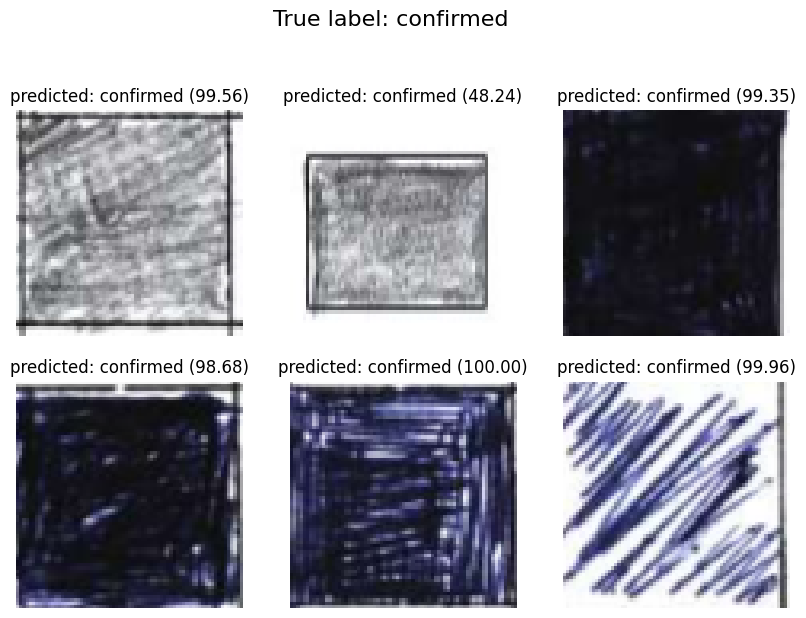

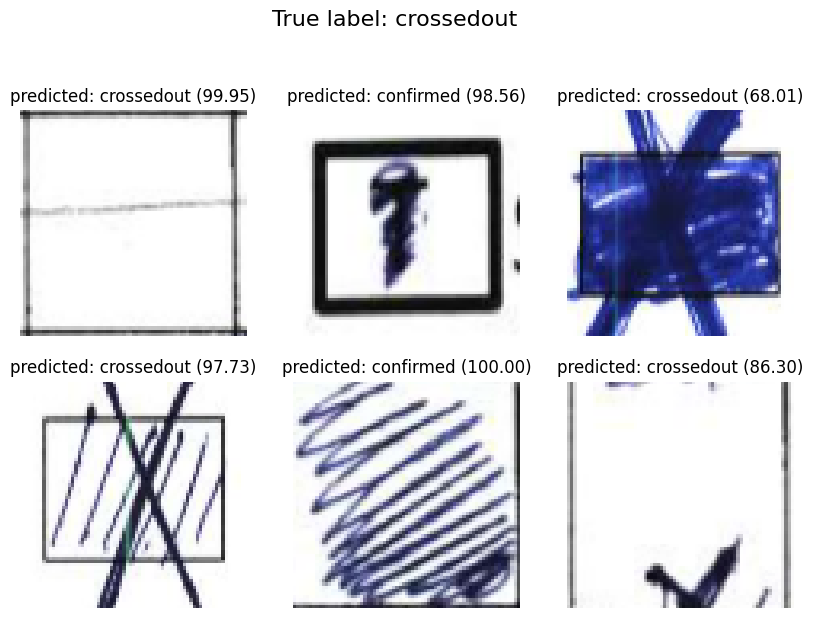

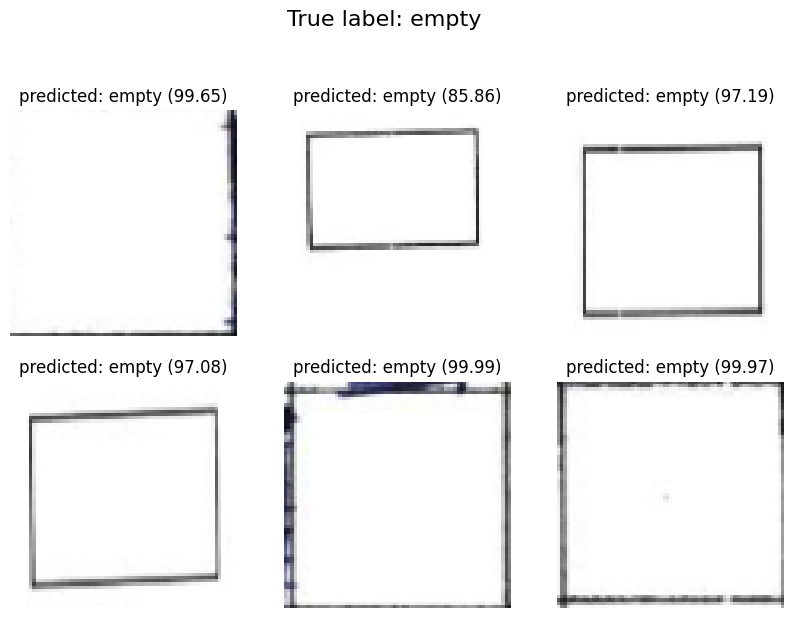

In [10]:
for true_label in class_names:
    image_batch = images[true_label]
    prediction_batch = predictions[true_label]
    label_batch = np.argmax(prediction_batch, axis=1)
    probability_batch = np.max(prediction_batch, axis=1)

    plt.figure(figsize=(10, 10))
    plt.suptitle("True label: " + true_label, fontsize=16)
    for i in range(len(image_batch)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].astype("uint8"))
        label = label_batch[i]
        ax.set_title(f"predicted: {class_names[label]} ({(probability_batch[i] * 100):.2f})")
        plt.axis("off")
    plt.show()